In [34]:
import pandas as pd # type: ignore
# 显示所有列
pd.set_option('display.max_columns', None)
# # 显示所有行
pd.set_option('display.max_rows', None) 
# 所有列并排展开
pd.set_option('display.width', 1000)

### 数据观察
#### x1,x3,x5,x6,x7,x8,x9,x11,x12是非二值离散型特征，且可能存在有序关系，进行标签编码
#### x2,x4,x10是连续型特征，且可能与年龄相关，依据最值进行分段后，进行标签编码
#### x13,x14,x15为1或2，转化为0/1二值特征；x16-24是二值特征，直接使用

In [35]:

df1 = pd.read_csv('..\Data\data_1.csv')
#### x1,x3,x5,x6,x7,x8,x9,x11,x12是非二值离散型特征，进行标签编码
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['X1'] = le.fit_transform(df1['X1'])
df1['X3'] = le.fit_transform(df1['X3'])
df1['X5'] = le.fit_transform(df1['X5'])
df1['X6'] = le.fit_transform(df1['X6'])
df1['X7'] = le.fit_transform(df1['X7'])
df1['X8'] = le.fit_transform(df1['X8'])
df1['X9'] = le.fit_transform(df1['X9'])
df1['X11'] = le.fit_transform(df1['X11'])
df1['X12'] = le.fit_transform(df1['X12'])

#### x2,x4,x10是连续性特征，分别算出其最大值和最小值，并对区间进行分段处理（分为5段），并进行独热编码
df1[['X2','X4','X10']] = df1[['X2','X4','X10']].astype(float)
df1['X2'] = pd.cut(df1['X2'], 5, labels=False)
df1['X4'] = pd.cut(df1['X4'], 5, labels=False)
df1['X10'] = pd.cut(df1['X10'], 5, labels=False)
#### x13,x14,x15为1或2，转化为0/1二值特征；x16-24是二值特征，直接使用
#### x25是标签列，直接使用
# df1 = pd.get_dummies(df1, columns=['X1','X3','X5','X6','X7','X8','X9','X11','X12'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# df1[['X2','X4','X10']] = scaler.fit_transform(df1[['X2','X4','X10']])
df1['X13'] = df1['X13'].apply(lambda X: 1 if X==2 else 0)
df1['X14'] = df1['X14'].apply(lambda X: 1 if X==2 else 0)
df1['X15'] = df1['X15'].apply(lambda X: 1 if X==2 else 0)
print(df1)
# 保存到csv
df1.to_csv('../Data/data1.csv',index=False)

     X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  X11  X12  X13  X14  X15  X16  X17  X18  X19  X20  X21  X22  X23  X24  Y(1=default, 0=non-default)
0     0   0   4   0   4   4   2   3   0    4    2    1    0    1    0    0    0    1    0    0    1    0    0    1                            0
1     1   3   2   1   0   2   1   1   0    0    2    0    0    0    0    0    0    1    0    0    1    0    0    1                            1
2     3   0   4   0   0   3   2   2   0    2    2    0    1    0    0    0    0    1    0    0    1    0    1    0                            0
3     0   2   2   2   0   3   2   3   1    2    2    0    1    0    0    0    0    0    0    0    0    0    0    1                            0
4     0   1   3   1   0   2   2   3   3    3    2    1    1    0    0    1    0    1    0    0    0    0    0    1                            1
5     3   2   2   2   4   2   2   3   3    1    2    0    1    1    0    0    0    1    0    0    0    0    1    0                      

### 数据观察
#### X1,X8,X9,X11,Y是0/1编码，不予改动
#### X2,X3,X7,X13,X14是连续型特征，进行minmaxscaler
#### X4,X5,X6,X10,X12是离散型特征，进行标签编码

In [36]:
### X1,X8,X9,X11,Y是0/1编码，不予改动
### X2,X3,X7,X13,X14是连续型特征，进行minmaxscaler
### X4,X5,X6,X10,X12是离散型特征，进行标签编码

df2 = pd.read_csv('..\Data\data_2.csv')
df2['X4'] = le.fit_transform(df2['X4'])
df2['X5'] = le.fit_transform(df2['X5'])
df2['X6'] = le.fit_transform(df2['X6'])
df2['X10'] = le.fit_transform(df2['X10'])
df2['X12'] = le.fit_transform(df2['X12'])
df2[['X2','X3','X7','X13','X14']] = scaler.fit_transform(df2[['X2','X3','X7','X13','X14']])
print(df2)
df2.to_csv('../Data/data2.csv',index=False)

     X1        X2        X3  X4  X5  X6        X7  X8  X9  X10  X11  X12        X13        X14  Y(1=default, 0=non-default)
0     1 -0.801052  1.347111   1   3   3 -0.190906   0   0    0    1    1  -0.488358   0.037380                            1
1     0 -0.751240  0.450548   1   7   3 -0.615536   0   0    0    0    1  -0.139591  -0.195413                            1
2     0 -0.167856 -0.604823   0   3   3 -0.291083   0   0    0    1    1   0.557943  -0.195413                            1
3     0 -0.835667  1.355152   0   4   2 -0.664877   1   1   11    1    1  -1.069637  -0.195413                            0
4     1 -0.962306  0.685745   1   5   3 -0.078768   1   1   14    0    1  -0.720870  -0.165066                            0
5     0 -1.328715 -0.839015   1   7   6 -0.216324   1   1    2    0    1  -0.488358  -0.195413                            0
6     1 -1.194477  0.350036   1   2   3 -0.627497   0   0    0    0    1  -0.720870  -0.176206                            1
7     0 

In [37]:
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.decomposition import PCA # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
import matplotlib.pyplot as plt # type: ignore

### 先通过计算两个常用相关系数观察出一个大致的规律

In [38]:
# 计算Spearman和Pearson相关系数
spearman_corr = df1.corr(method='spearman')
pearson_corr = df1.corr()

# 显示Spearman相关系数
print("\nSpearman Correlation:")
print(spearman_corr)

# 显示Pearson相关系数
print("\nPearson Correlation:")
print(pearson_corr)

# 假设你的相关系数矩阵存储在变量 corr 中
spearman_corr.to_csv('../Data/Q1_spearman_correlation_matrix.csv')
pearson_corr.to_csv('../Data/Q1_pearson_correlation_matrix.csv')



Spearman Correlation:
                                   X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13       X14       X15       X16       X17       X18       X19       X20       X21       X22       X23       X24  Y(1=default, 0=non-default)
X1                           1.000000 -0.066189  0.190632 -0.045450  0.242742  0.099142  0.043597 -0.048577 -0.027092  0.079351  0.042900  0.087348 -0.019721  0.069000 -0.032244 -0.072265  0.061935  0.119548 -0.053566 -0.093584  0.131967 -0.044708 -0.040011  0.050986                    -0.347944
X2                          -0.066189  1.000000 -0.036252  0.522728  0.028175  0.036401  0.023507  0.032919  0.286002 -0.033349 -0.081574  0.026946 -0.016503  0.185191 -0.144111 -0.117294  0.151409  0.013372  0.034028 -0.069808 -0.049783 -0.032589 -0.193015  0.059673                     0.211040
X3                           0.190632 -0.036252  1.000000 -0.006788  0.014782  0.14788

In [39]:
# 将Spearman相关系数矩阵转换为DataFrame（如果还不是的话）
spearman_corr_df = pd.DataFrame(spearman_corr)

# 对Spearman相关系数进行排序（从大到小）
sorted_spearman_corr = spearman_corr_df.stack().sort_values(ascending=False)

# 打印排序后的Spearman相关系数
print("\nSorted Spearman Correlation (from highest to lowest):")
print(sorted_spearman_corr)

# 将Pearson相关系数矩阵转换为DataFrame（如果还不是的话）
pearson_corr_df = pd.DataFrame(pearson_corr)

# 对Pearson相关系数进行排序（从大到小）
sorted_pearson_corr = pearson_corr_df.stack().sort_values(ascending=False)

# 打印排序后的Pearson相关系数
print("\nSorted Pearson Correlation (from highest to lowest):")
print(sorted_pearson_corr)

# sorted_pearson_corr.to_csv('../Data/Q1_sorted_pearson_correlation.csv')
# sorted_spearman_corr.to_csv('../Data/Q1_sorted_spearman_correlation.csv')


Sorted Spearman Correlation (from highest to lowest):
X1                           X1                             1.000000
X14                          X14                            1.000000
X4                           X4                             1.000000
X5                           X5                             1.000000
X6                           X6                             1.000000
X7                           X7                             1.000000
X8                           X8                             1.000000
X9                           X9                             1.000000
X10                          X10                            1.000000
X11                          X11                            1.000000
X12                          X12                            1.000000
X15                          X15                            1.000000
X2                           X2                             1.000000
X16                          X16                

In [40]:
# 去除重复的Spearman相关系数
sorted_spearman_corr_unique = sorted_spearman_corr.drop_duplicates()

# 打印唯一的Spearman相关系数
print("\nUnique Sorted Spearman Correlation (from highest to lowest):")
print(sorted_spearman_corr_unique)

# 同样地，对Pearson相关系数做相同的处理
sorted_pearson_corr_unique = sorted_pearson_corr.drop_duplicates()

# 打印唯一的Pearson相关系数
print("\nUnique Sorted Pearson Correlation (from highest to lowest):")
print(sorted_pearson_corr_unique)

sorted_pearson_corr_unique.to_csv('../Data/Q1_unique_sorted_pearson_correlation.csv')
sorted_spearman_corr_unique.to_csv('../Data/Q1_unique_sorted_spearman_correlation.csv')


Unique Sorted Spearman Correlation (from highest to lowest):
X1                           X1                             1.000000
X4                           X2                             0.522728
X12                          X3                             0.506025
X6                           X10                            0.298255
X2                           X9                             0.286002
X9                           X4                             0.273913
X4                           X17                            0.263019
X8                           X6                             0.256016
                             X10                            0.250497
X4                           X14                            0.246807
X5                           X1                             0.242742
Y(1=default, 0=non-default)  X2                             0.211040
X14                          X9                             0.196154
X1                           X3          

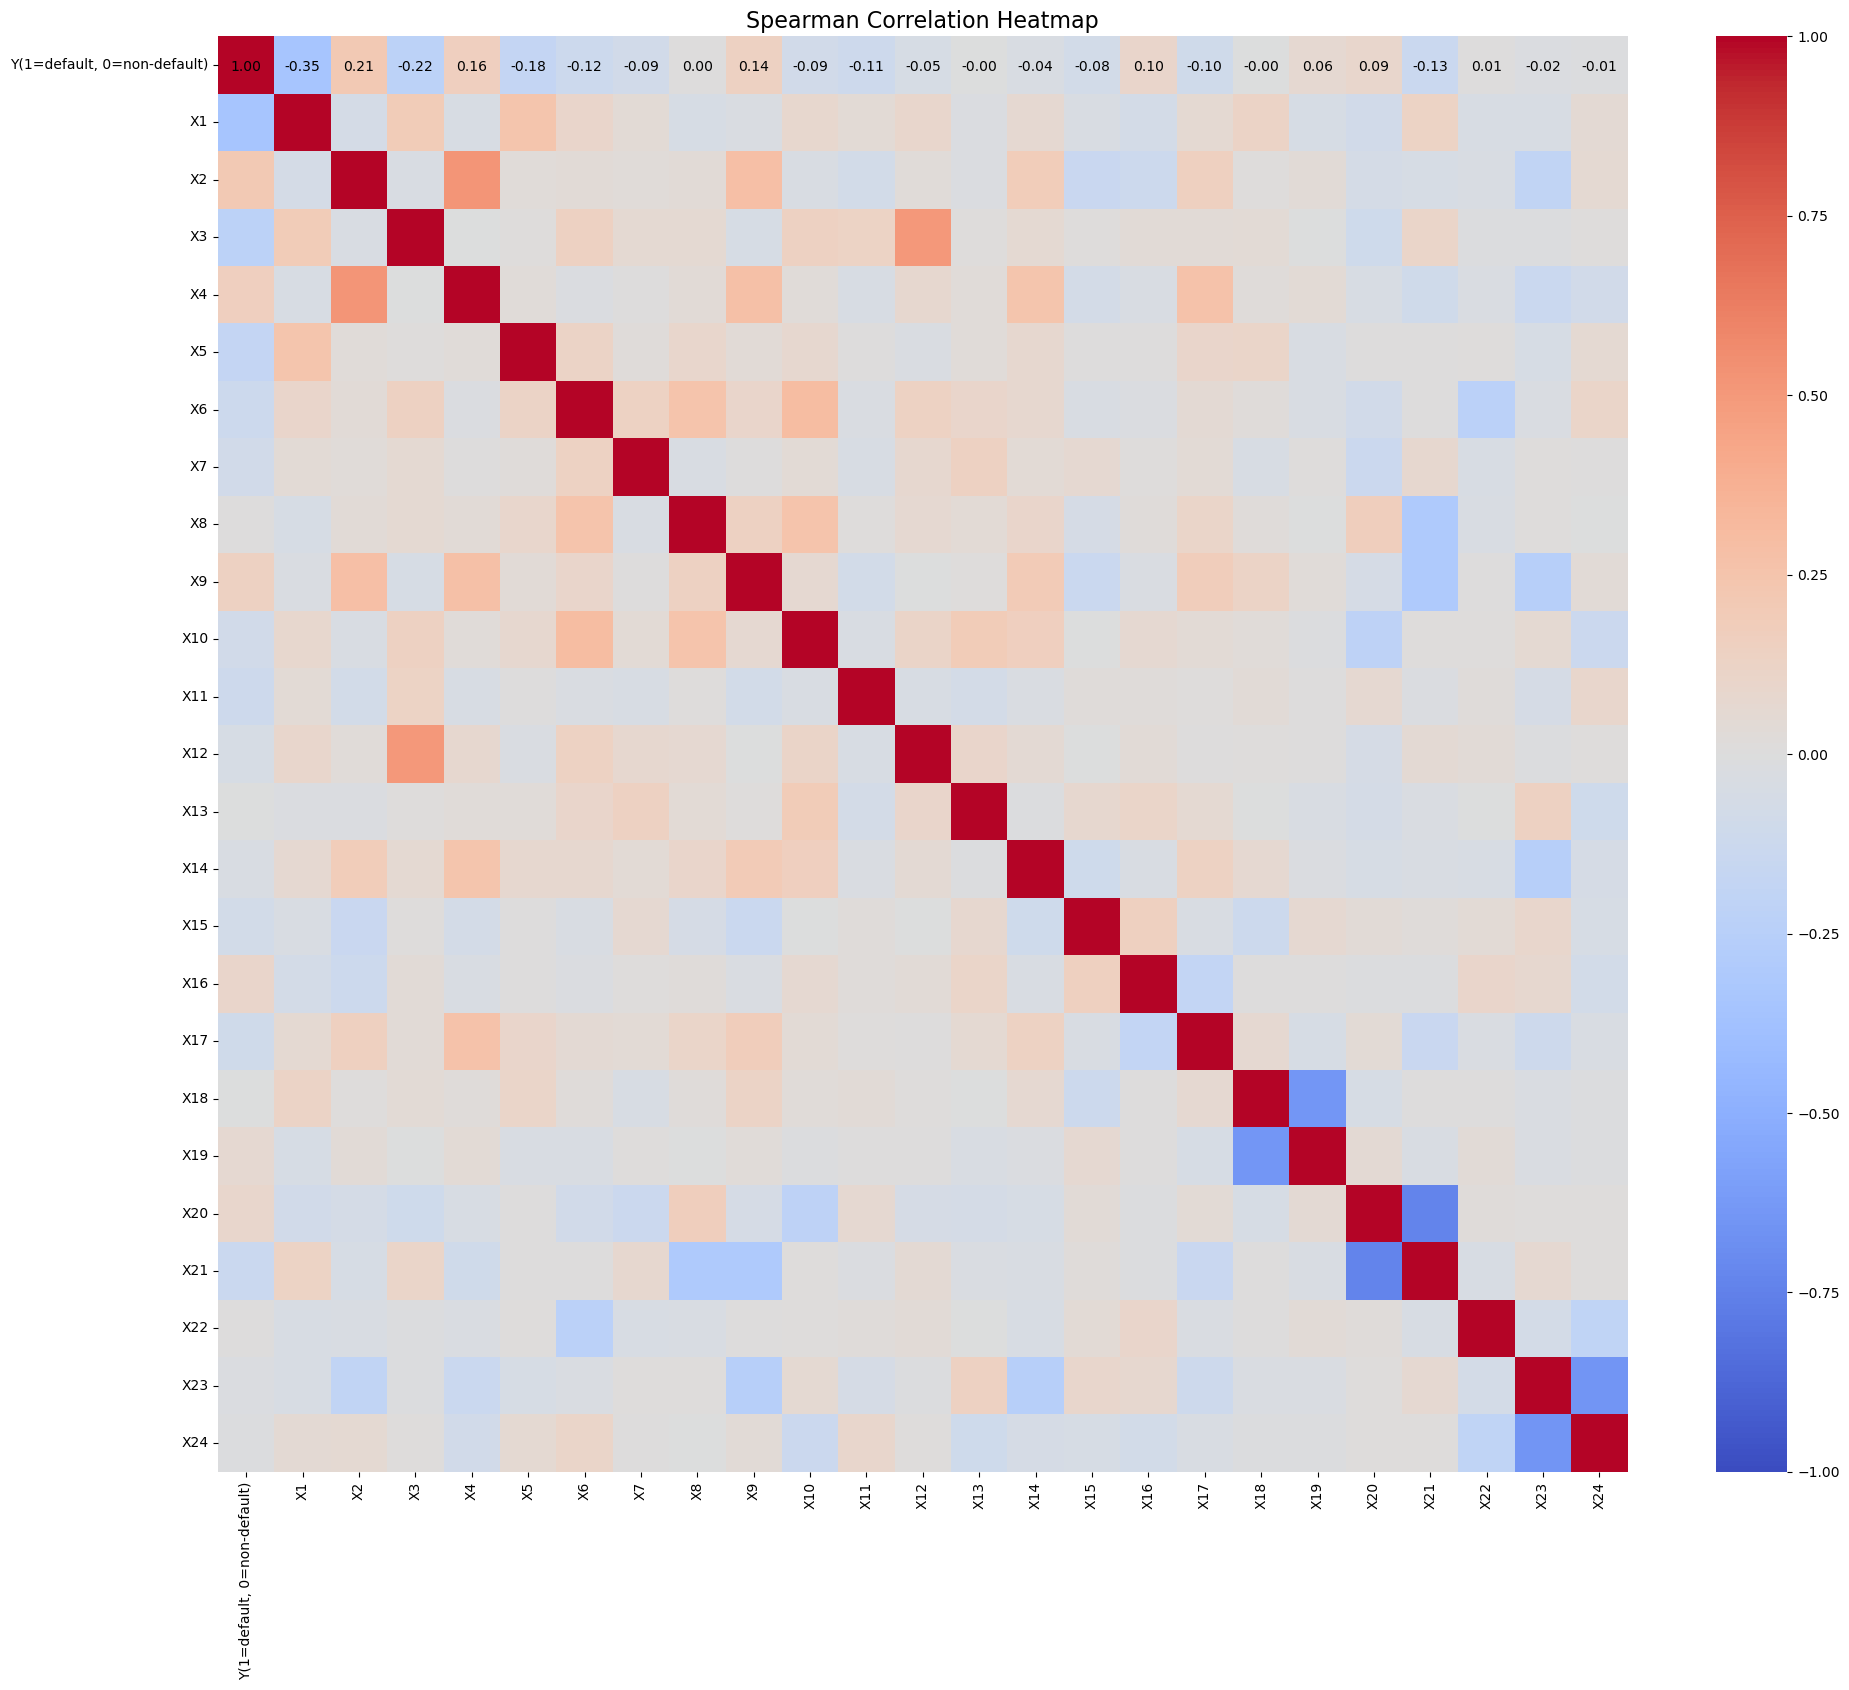

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 获取列名和索引名
columns = spearman_corr.columns.tolist()
index = spearman_corr.index.tolist()

# 将最后一列名移到第一位
columns = [columns[-1]] + columns[:-1]

# 将最后一行索引名移到第一位
index = [index[-1]] + index[:-1]

# 重新排序列和行
corr_reordered = spearman_corr.loc[index, columns]

# 创建图形
plt.figure(figsize=(20, 17))

# 使用 seaborn 绘制热图

# 需要蔺经纬同志调配色！
sns.heatmap(corr_reordered, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
# 需要蔺经纬同志调配色！

last_row = spearman_corr.iloc[-1]
modified_last_row = pd.Series(
    [last_row.iloc[-1]] + last_row.iloc[:-1].tolist(), 
    index=last_row.index
)

# 在第一行上方添加相关系数文本

for i, val in enumerate(modified_last_row):
    plt.text(i + 0.5, 0.65, f'{val:.2f}', ha='center', va='bottom')

# 设置标题和标签
plt.title('Spearman Correlation Heatmap', fontsize=16)
# plt.xlabel('Features', fontsize=12)
# plt.ylabel('Features', fontsize=12)

plt.savefig('../Data/Q1_Spearman_Correlation_Heatmap.png')

# 调整布局并显示
plt.tight_layout()
plt.show()

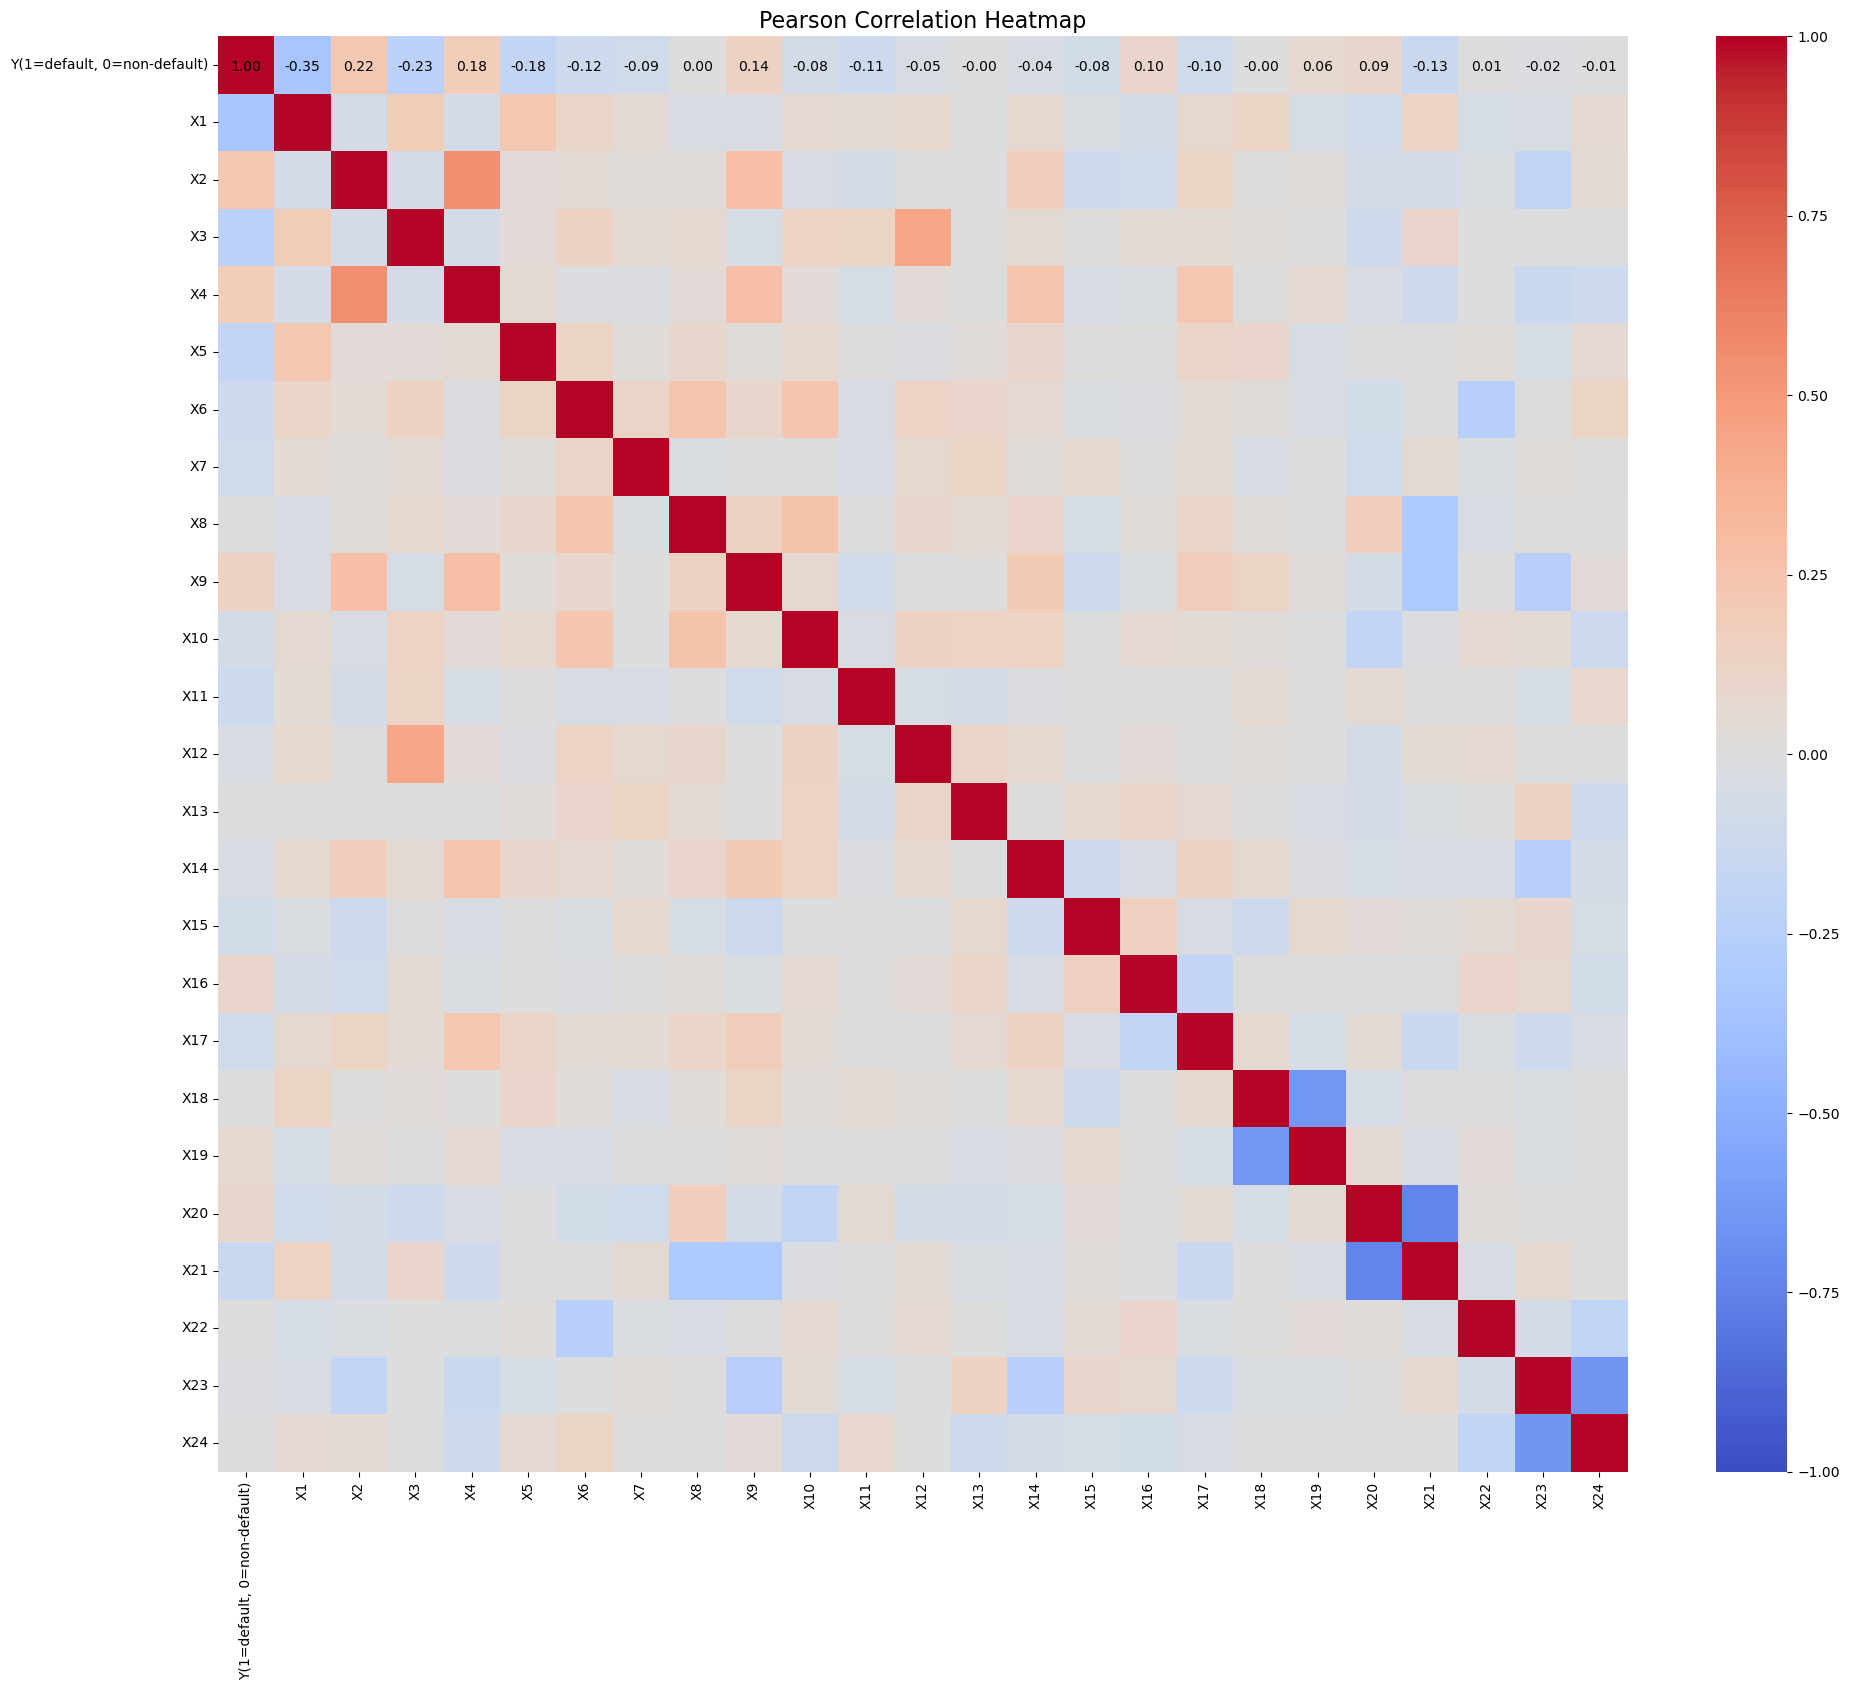

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 获取列名和索引名
columns = pearson_corr.columns.tolist()
index = pearson_corr.index.tolist()

# 将最后一列名移到第一位
columns = [columns[-1]] + columns[:-1]

# 将最后一行索引名移到第一位
index = [index[-1]] + index[:-1]

# 重新排序列和行
corr_reordered = pearson_corr.loc[index, columns]

# 创建图形
plt.figure(figsize=(20, 17))

# 使用 seaborn 绘制热图
# 需要蔺经纬同志调配色！
sns.heatmap(corr_reordered, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
# 需要蔺经纬同志调配色！

last_row = pearson_corr.iloc[-1]
modified_last_row = pd.Series(
    [last_row.iloc[-1]] + last_row.iloc[:-1].tolist(), 
    index=last_row.index
)

# 在第一行上方添加相关系数文本

for i, val in enumerate(modified_last_row):
    plt.text(i + 0.5, 0.65, f'{val:.2f}', ha='center', va='bottom')

# 设置标题和标签
plt.title('Pearson Correlation Heatmap', fontsize=16)
# plt.xlabel('Features', fontsize=12)
# plt.ylabel('Features', fontsize=12)

plt.savefig('../Data/Q1_Pearson_Correlation_Heatmap.png')

# 调整布局并显示
plt.tight_layout()
plt.show()

### WOE+IV方法进行佐证

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 读取数据
data = pd.read_csv('../Data/data_1.csv')

# 将目标变量重命名为'target'
data.rename(columns={'Y(1=default, 0=non-default)': 'target'}, inplace=True)

def calculate_woe_iv(df, feature, target):
    df = df[[feature, target]].copy()
    
    # 对于数值型特征,进行分箱
    if df[feature].dtype in ['int64', 'float64']:
        df[feature] = pd.qcut(df[feature], q=10, duplicates='drop')
    
    # 计算每个分箱的好坏样本数
    grouped = df.groupby(feature)[target].agg(['count', 'sum']).reset_index()
    grouped.columns = [feature, 'total', 'bad']
    grouped['good'] = grouped['total'] - grouped['bad']
    
    # 计算总体的好坏样本数
    total_bad = grouped['bad'].sum()
    total_good = grouped['good'].sum()
    
    # 计算WOE和IV
    grouped['bad_rate'] = grouped['bad'] / total_bad
    grouped['good_rate'] = grouped['good'] / total_good
    grouped['woe'] = np.log(grouped['good_rate'] / grouped['bad_rate'])
    grouped['iv'] = (grouped['good_rate'] - grouped['bad_rate']) * grouped['woe']
    
    # 处理无穷大和NaN值
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
    iv = grouped['iv'].sum()
    
    return iv

# 计算每个特征的IV值
iv_values = {}
for feature in data.columns:
    if feature != 'target':
        iv = calculate_woe_iv(data, feature, 'target')
        iv_values[feature] = iv

# 对IV值进行排序
iv_values = dict(sorted(iv_values.items(), key=lambda x: x[1], reverse=True))

# 打印IV值
print("IV values for each feature:")
for feature, iv in iv_values.items():
    print(f"{feature}: {iv}")

# 选择IV值大于0.02的特征
selected_features = [feature for feature, iv in iv_values.items() if iv > 0.02]
print("\nSelected features:")
print(selected_features)

IV values for each feature:
X1: 0.6393719544939376
X2: 0.24654188863116078
X5: 0.1908894282043878
X3: 0.17905826041249406
X4: 0.12615231152872586
X10: 0.10062227273111429
X6: 0.0853013783927199
X9: 0.08335759941194099
X7: 0.04268937536930112
X12: 0.0035847291092131707
X23: 0.0023021245692089673
X8: 0.000577388160207934
X11: 0.0
X13: 0.0
X14: 0.0
X15: 0.0
X16: 0.0
X17: 0.0
X18: 0.0
X19: 0.0
X20: 0.0
X21: 0.0
X22: 0.0
X24: 0.0

Selected features:
['X1', 'X2', 'X5', 'X3', 'X4', 'X10', 'X6', 'X9', 'X7']


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11124\1579163324.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(feature)[target].agg(['count', 'sum']).reset_index()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11124\1579163324.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(feature)[target].agg(['count', 'sum']).reset_index()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11124\1579163324.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or o

### X1,X2,X3,X4,X5,X6,X7,X8,X9,X10